In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#paramaters
pars = {}
pars['a00'] = 1
pars['a01'] = 0.5
pars['T1'] = 100
pars['a11'] = 1
pars['a10'] = 0.5
pars['T2'] = 100

pars['gamma0'] = 1
pars['gamma1'] = 1

pars['delta_t'] = 0.01
pars['Kb'] = 1.380649*10**-23

In [3]:
def euler_one_traj(n_time, pars):   
    #initial condition
    x1 = 0
    x2 = 0
    x1_traj = []
    x2_traj = []
    
    #performing 1 traj with n_time number of data points
    for i in range(n_time):
        #generate delta_B
        s1 = np.random.normal(0, np.sqrt(pars['delta_t']) )
        s2 = np.random.normal(0, np.sqrt(pars['delta_t']) )
        #solve for x1, x2
        x1_new = x1 - (pars['a00']/pars['gamma0'])*x1*pars['delta_t'] - \
        (pars['a01']/pars['gamma0'])*x2*pars['delta_t'] + \
        np.sqrt((2*pars['Kb']*pars['T1'])/pars['gamma0'])*s1
                 
        x2_new = x2 - (pars['a11']/pars['gamma1'])*x2*pars['delta_t'] - \
        (pars['a10']/pars['gamma1'])*x1*pars['delta_t'] + \
        np.sqrt((2*pars['Kb']*pars['T2'])/pars['gamma1'])*s2
                
        x1 = x1_new
        x2 = x2_new
        
        x1_traj.append(x1)
        x2_traj.append(x2)
    return x1_traj, x2_traj

In [4]:
trajx0, trajx1 = euler_one_traj(100, pars)

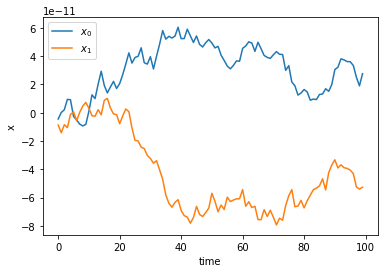

In [5]:
plt.plot(trajx0, label='$x_0$')
plt.plot(trajx1, label='$x_1$')
plt.xlabel('time')
plt.ylabel('x')
plt.legend()
plt.show()

Autocorrelation

$ \sigma_x = \sqrt{ < ( x - < x > )^2 > }$

$ \sigma_y = \sqrt{ < ( y - < y > )^2 > }$

$ \rho = \frac{< ( x- < x > ) ( y - < y > ) > } { \sigma_x \sigma_y} $

where

$x = x(t) $

$y = x(t + tau)$

In [6]:
tau = 2
trajx0_tau = np.roll(trajx0, tau)
#np.roll example
#x(t) = [0,1,2,3,4]
#x(t + tau) = [3,4,0,1,2]
#but in all computations: discard 3,4 after in x(t+tau)

In [7]:
def autocorrelation_position(x, xtau, tau):
    mean_x = np.mean(x)
    mean_xtau = np.mean(xtau[tau::])
    
    corr_list = []
    for x_value, xtau_value in zip(x, xtau):
        numerator = np.mean((x_value - mean_x)*(xtau_value - mean_xtau))
        sigma_x = np.sqrt(np.mean((x_value - mean_x)**2))
        sigma_xtau = np.sqrt(np.mean((xtau_value - mean_xtau)**2))
        corr = numerator/(sigma_x*sigma_xtau)
        corr_list.append(corr)
        
    return corr_list

In [8]:
corr = autocorrelation_position(trajx0, trajx0_tau, tau)

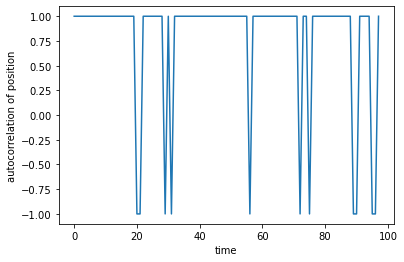

In [9]:
plt.plot(corr[tau::])
plt.xlabel('time')
plt.ylabel('autocorrelation of position')
plt.show()